In [1]:
import numpy as np, matplotlib.pyplot as plt, scipy, math#, scienceplots
from random import randint
#plt.style.use('science') #science plots isn't working on laptop for some reason

# Assignment 4
### Section 7.1
Page 199

#### (a)

First we make a functiion wich generates a list of positions for a random walk.

In [2]:
def rand_walk(start=(0,0), steps=1000):
    data = []
    x, y = start[0],start[1]
    dx, dy = 1, 1
    for setp in range(steps):
        data.append([x,y])
        rand = randint(0,7) # generate 8 possible random numbers for 8 possible random steps 
        if rand == 0: # bassed on the output of the randint function, take a one step in one of the eight possible directions
            x += dx 
            y += dy
        elif rand == 1: 
            x -= dx 
            y += dy
        elif rand == 2: 
            x += dx 
            y -= dy
        elif rand == 3: 
            x -= dx 
            y -= dy        
        elif rand == 4: x += dy
        elif rand == 5: x -= dy
        elif rand == 6: y += dy
        elif rand == 7: y -= dy
    return np.array(data).T # return the transpose of the array so it's easier to plot

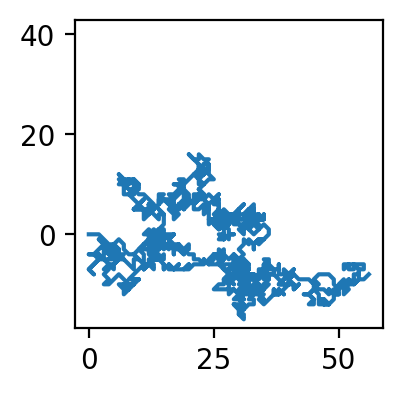

In [3]:
x, y = rand_walk() # call the function to create the x and y values for the plot
fig, ax = plt.subplots(1,1,figsize=(2,2),dpi=200)
ax.plot(x,y)
ax.axis('square')
plt.show()

#### (b)

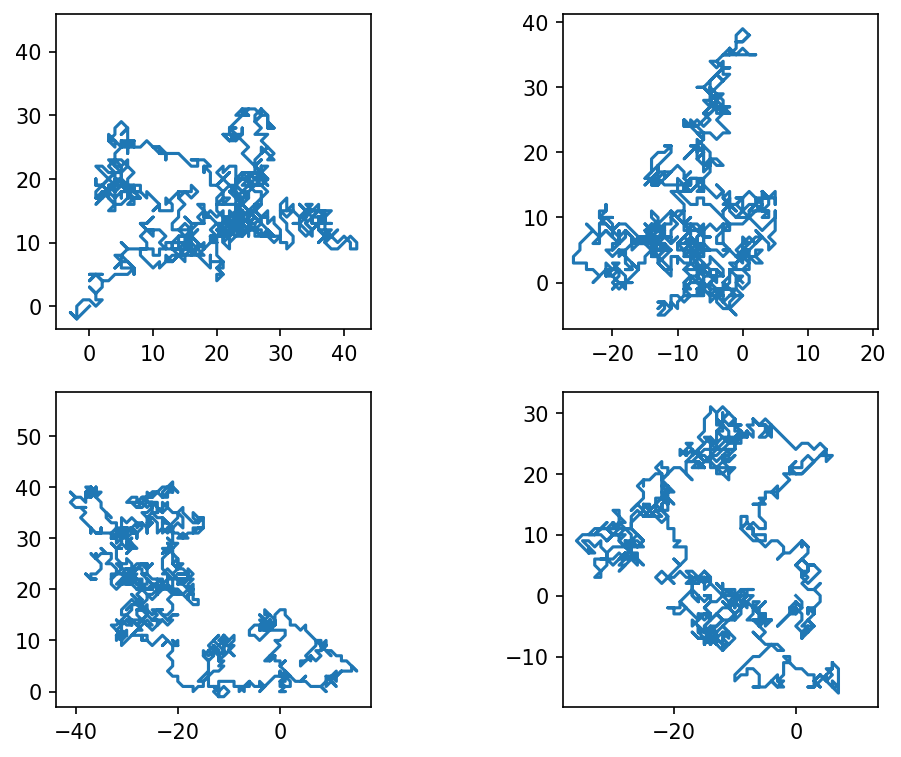

In [4]:
fig, ax = plt.subplots(2,2,figsize=(8,6),dpi=150)
axes_x, axes_y = [0,0,1,1,], [0,1,0,1] # setting up the indices for the axes
for i0, (i1, i2) in enumerate(zip(axes_x,axes_y)): # loop through the indices of the axes plot a seperate random walk for each set of indices
    x,y = rand_walk()
    ax[i1,i2].plot(x,y,label="plot{i0}")
    ax[i1,i2].axis('square')
plt.show()

### 7.2
####  (a)

The question asks us to make one plot then also asks to plot the end points. With one plot there should be only one end point. This does not make any sense. 

In [5]:
def displacement(x,y): # making a function that returns the displacement of a 2D point from the origion 
    return np.sqrt(x**2+y**2)

Next, we create a function which preforms N random walks with a given number of steps and returns the endpoints for these walks as well as the displacement form these endpoints.

In [6]:
def endpoint_distribution(N=1000, steps=1000):
    endpoints, endpoint_distances = [], [] # ititializing the list of endpoints and endpoint displacements
    for i in range(N):
        x, y = rand_walk(steps=steps) # generate the x and y coords for a random walk with steps number of steps
        dif = displacement(x[-1], y[-1]) # calculate the displacement from the end of the random walk to the origin 
        endpoints.append([x[-1], y[-1]]) # append the endpoints to the endpoint list
        endpoint_distances.append(dif) # append the displacement to the endpoint distances list
    endpoints = np.array(endpoints).T # transpose the endpoints array to make it more convenient for plotting
    return endpoints, endpoint_distances

In [7]:
endpoints, endpoint_distances = endpoint_distribution(N=1000, steps=1000) # call the endpoint_distribution function to generate data

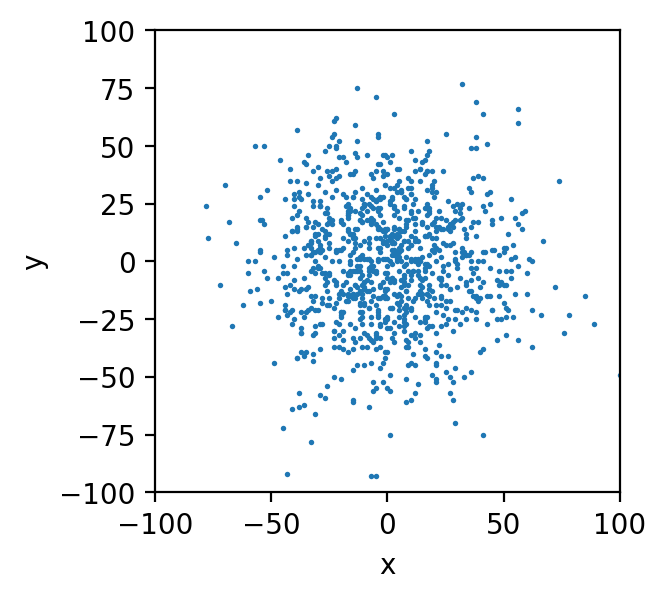

In [8]:
fig, ax = plt.subplots(1,1,figsize=(3,3),dpi=200)
ax.scatter(endpoints[0], endpoints[1], s=0.9) # making a scatter plot with the endpoints data
ax.set_xlabel("x")
ax.set_ylabel("y")
max_endpoint = max(endpoints.flatten()) # get the max value form the flattened list of endpoints
ax.set_xlim(-max_endpoint,max_endpoint) # use the max value to set the limits of the x and y axis
ax.set_ylim(-max_endpoint,max_endpoint)
_=plt.plot()

#### (b)

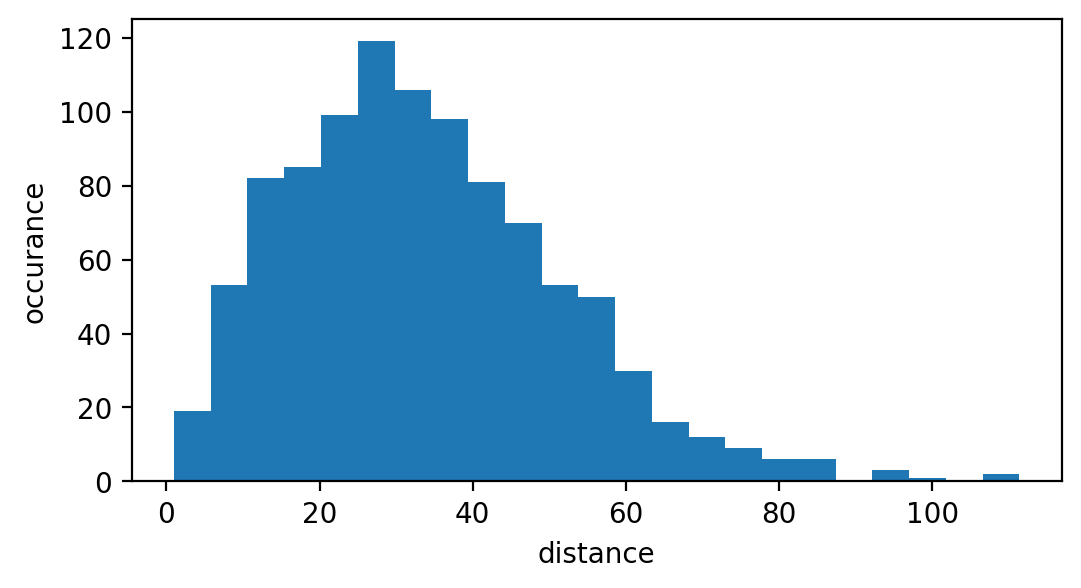

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(endpoint_distances, bins='auto')
x = np.linspace(0,100,20)
ax.set_xlabel("distance")
ax.set_ylabel("occurance")
_=plt.plot()

#### (c)

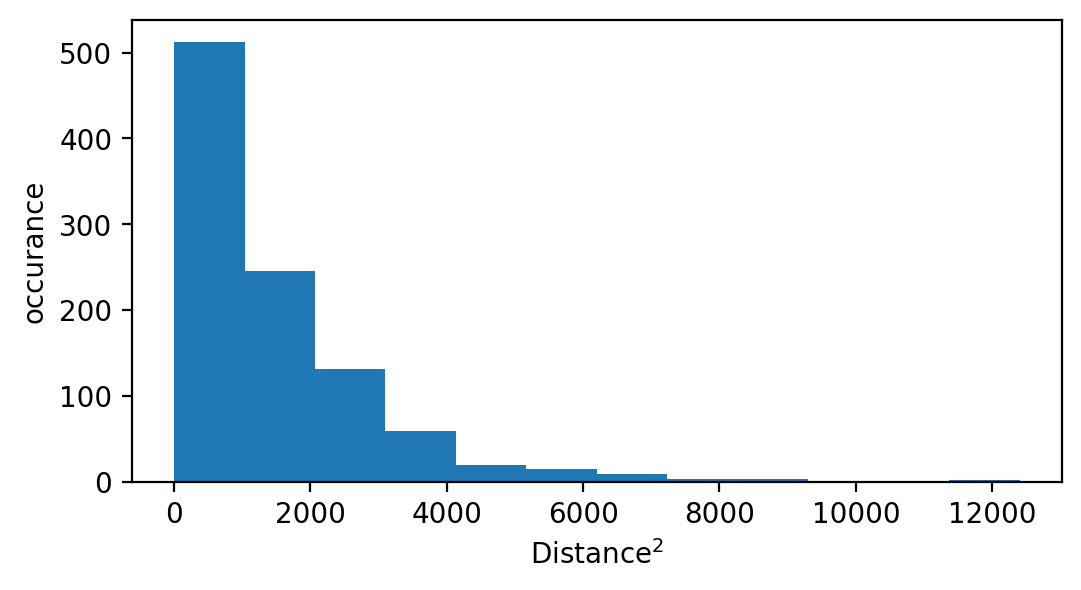

In [10]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(np.array(endpoint_distances)**2, bins=12)
ax.set_xlabel("Distance$^2$")
ax.set_ylabel("occurance")
_=plt.plot()

#### (d)

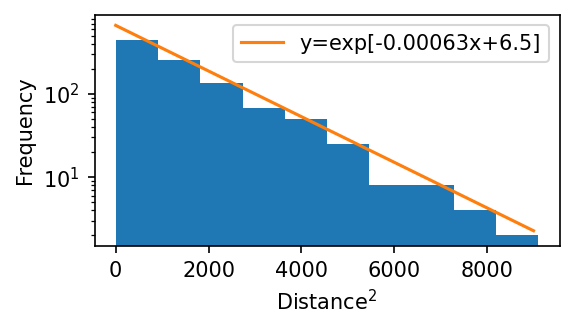

In [58]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(np.array(endpoint_distances)**2, bins=10)
x = np.linspace(0,9000,20)
m, b = -10**-3.2, 6.5
y = np.exp(m*x+b)
ax.plot(x,y,label=f"y=exp[{round(m,5)}x+{b}]")
ax.set_xlabel("Distance$^2$")
ax.set_ylabel("Frequency")
ax.set_yscale('log')
ax.legend()
_=plt.plot()

There seems to be a linear relationship between $\text{Distance}^2$ and $\ln(\text{occurence})$.

#### (e)

In [62]:
print(f"The mean squared endpoint distance from the origin is {np.mean(np.array(endpoint_distances)**2)} for a 1000 step random walk.")

The mean squared endpoint distance from the origin is 1530.429 for a 1000 step random walk.


#### (f)

In [14]:
endpoints, endpoint_distances = endpoint_distribution(N=1000, steps=4000) # generate endpoint distances for a 4000 steop random walk

In [61]:
print(f"The mean squared endpoint distance from the origin is {np.mean(np.array(endpoint_distances)**2)} for a 4000 step random walk.")

The mean squared endpoint distance from the origin is 1530.429 for a 4000 step random walk.


### 7.3.1

#### (a)

$$
P(l) = \frac{e^{-\lambda}\cdot\lambda^l}{l!}
$$
$l$ is the number of occurrences
$\lambda$ is the expected value and also it's variance 

In [16]:
poisson = lambda l, lamb: np.exp(-lamb)*(lamb**l)/scipy.special.factorial(l) # Define an poisson function according to the equation above

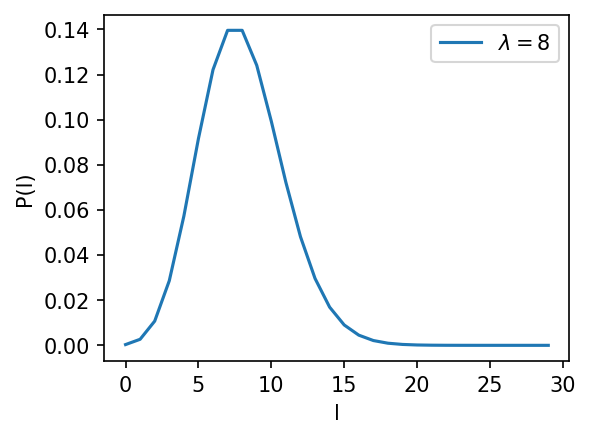

In [17]:
x = np.arange(30,dtype=float)
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.plot(x, poisson(l=x,lamb=8),label="$\lambda = 8$") # plotting the poisson distribution where lambda is equal to 8
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

#### (b)

Next, we create a function to simulate flipping a coin

In [18]:
def flip(chance_of_heads=8): # 1 represents heads and 0 represents tails 
    if randint(1,100) <= chance_of_heads: return 1
    else: return 0

Create a function which calls with flip function for num_flips times and returns a list of the results.

In [19]:
def flip_trial(num_flips=100):  
    return [flip() for i in range(num_flips)] # returns of list of heads and tails 

Create a function which returns a list of the sum of the times the coin was heads from the flip_trial function for N trials.

In [20]:
def master_flip_trial(N=1000):
    return [sum(flip_trial()) for i in range(N)]

#### (c)

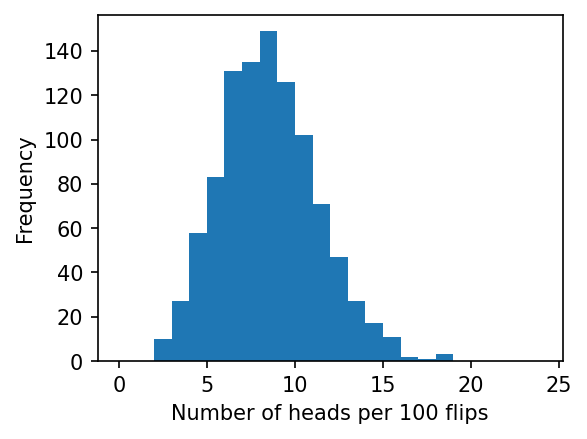

In [21]:
N = 1000
bins = np.arange(25,dtype=int)
fig,ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=bins) # creating a histogram to show the number of times heads was recorded out of 100 for a total of 1000 trials
ax.set_xlabel("Number of heads per 100 flips")
ax.set_ylabel("Frequency")
_ = plt.show()

#### (d)

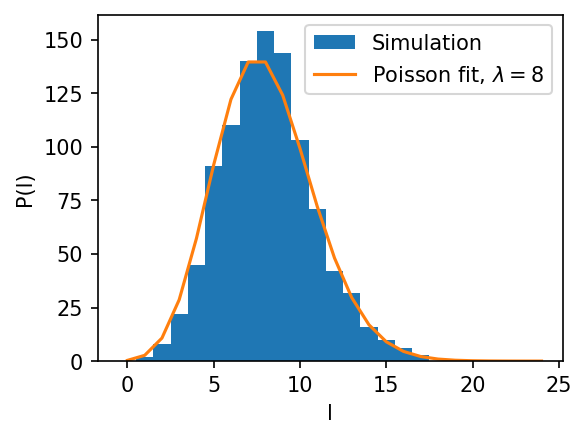

In [22]:
N=1000
x = np.arange(25,dtype=float)
bins = np.arange(25,dtype=float)-0.5
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=bins,label="Simulation")
ax.plot(x, poisson(l=x,lamb=8)*N,label=f"Poisson fit, $\lambda = 8$") # plotting the poisson function over top of the histogram from the previous question
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

#### (e)

Repeting the previous question for N = 1,000,000 trials.

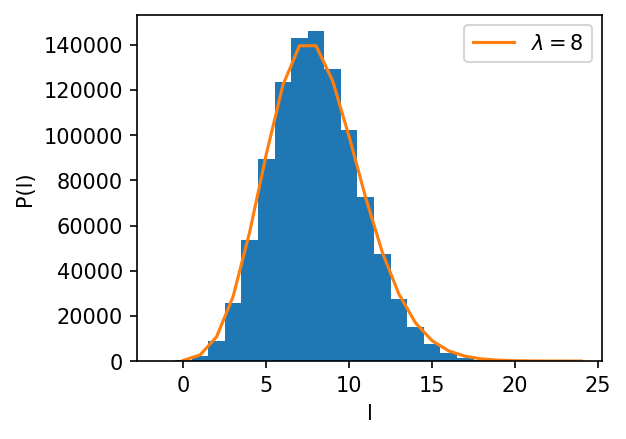

In [23]:
N = 1_000_000
x = np.arange(25,dtype=float)
bins = np.arange(25,dtype=float)-1.5
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=bins)
ax.plot(x, poisson(l=x,lamb=8)*N,label=f"$\lambda = 8$")
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

### 7.3.2

#### (a)

Define a function which returns difference in position between ones in an array. This will give the frequncy of heads when a flip trial is given at the argument.

In [24]:
def freq(arr):
    ones = np.nonzero(arr)
    return np.diff(ones[0])

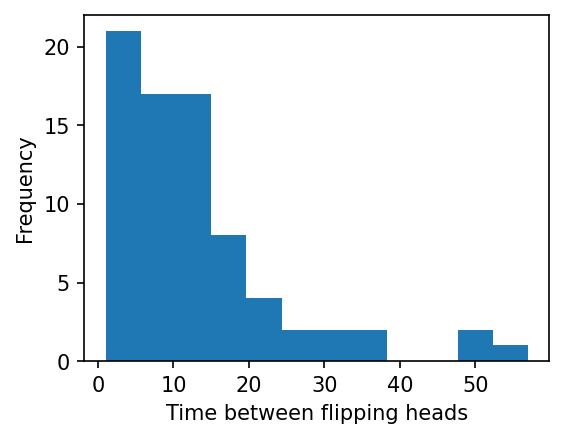

In [25]:
N = 1000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins='auto') # plotting the frequency of heads for a flip trial with N flips
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
_=plt.show()

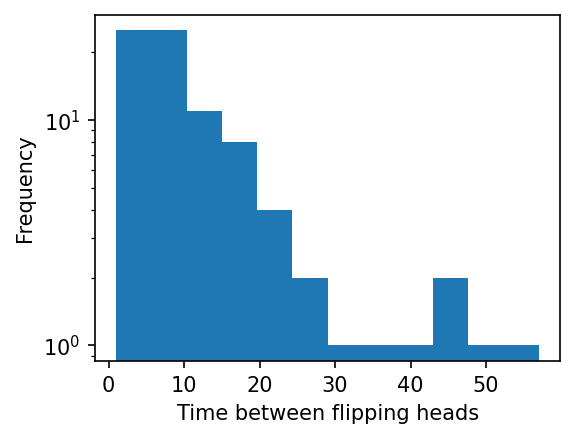

In [26]:
N = 1000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins='auto') 
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
ax.set_yscale('log') # changing the y scale to log
_=plt.show()

There seemss to be a linear relationship between the instances where heads is flipped and the log of the frequency.

#### (b)

In [27]:
print(f"The average waiting time is {round(np.mean(freq(flip_trial(num_flips=10_000))),2)} flips.")

The average waiting time is 12.99 flips.


#### (c)

Repeating (a) and (b) for N = 1,000,000

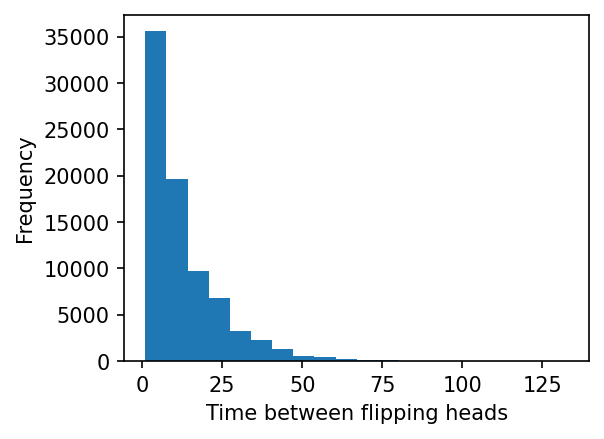

In [28]:
N = 1_000_000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins=20)
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
_=plt.show()

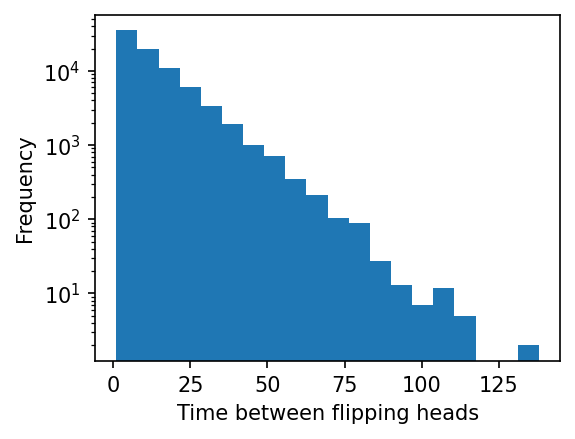

In [29]:
N = 1_000_000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins=20)
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
ax.set_yscale("log")
_=plt.show()

With more data, we can comfirm that the realtiionship is indeed linear. 